In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Loding the data
housing= pd.read_csv("/Users/sumanshrestha/Documents/AI Class Omdena/machine-learning-introduction-makaisuman/data/boston_housing.csv")

In [17]:
#checking the first 5 data
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [18]:
#checking the data structue and type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [19]:
#Statistics of the data
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


# Visualize relationships between features and the target variable.

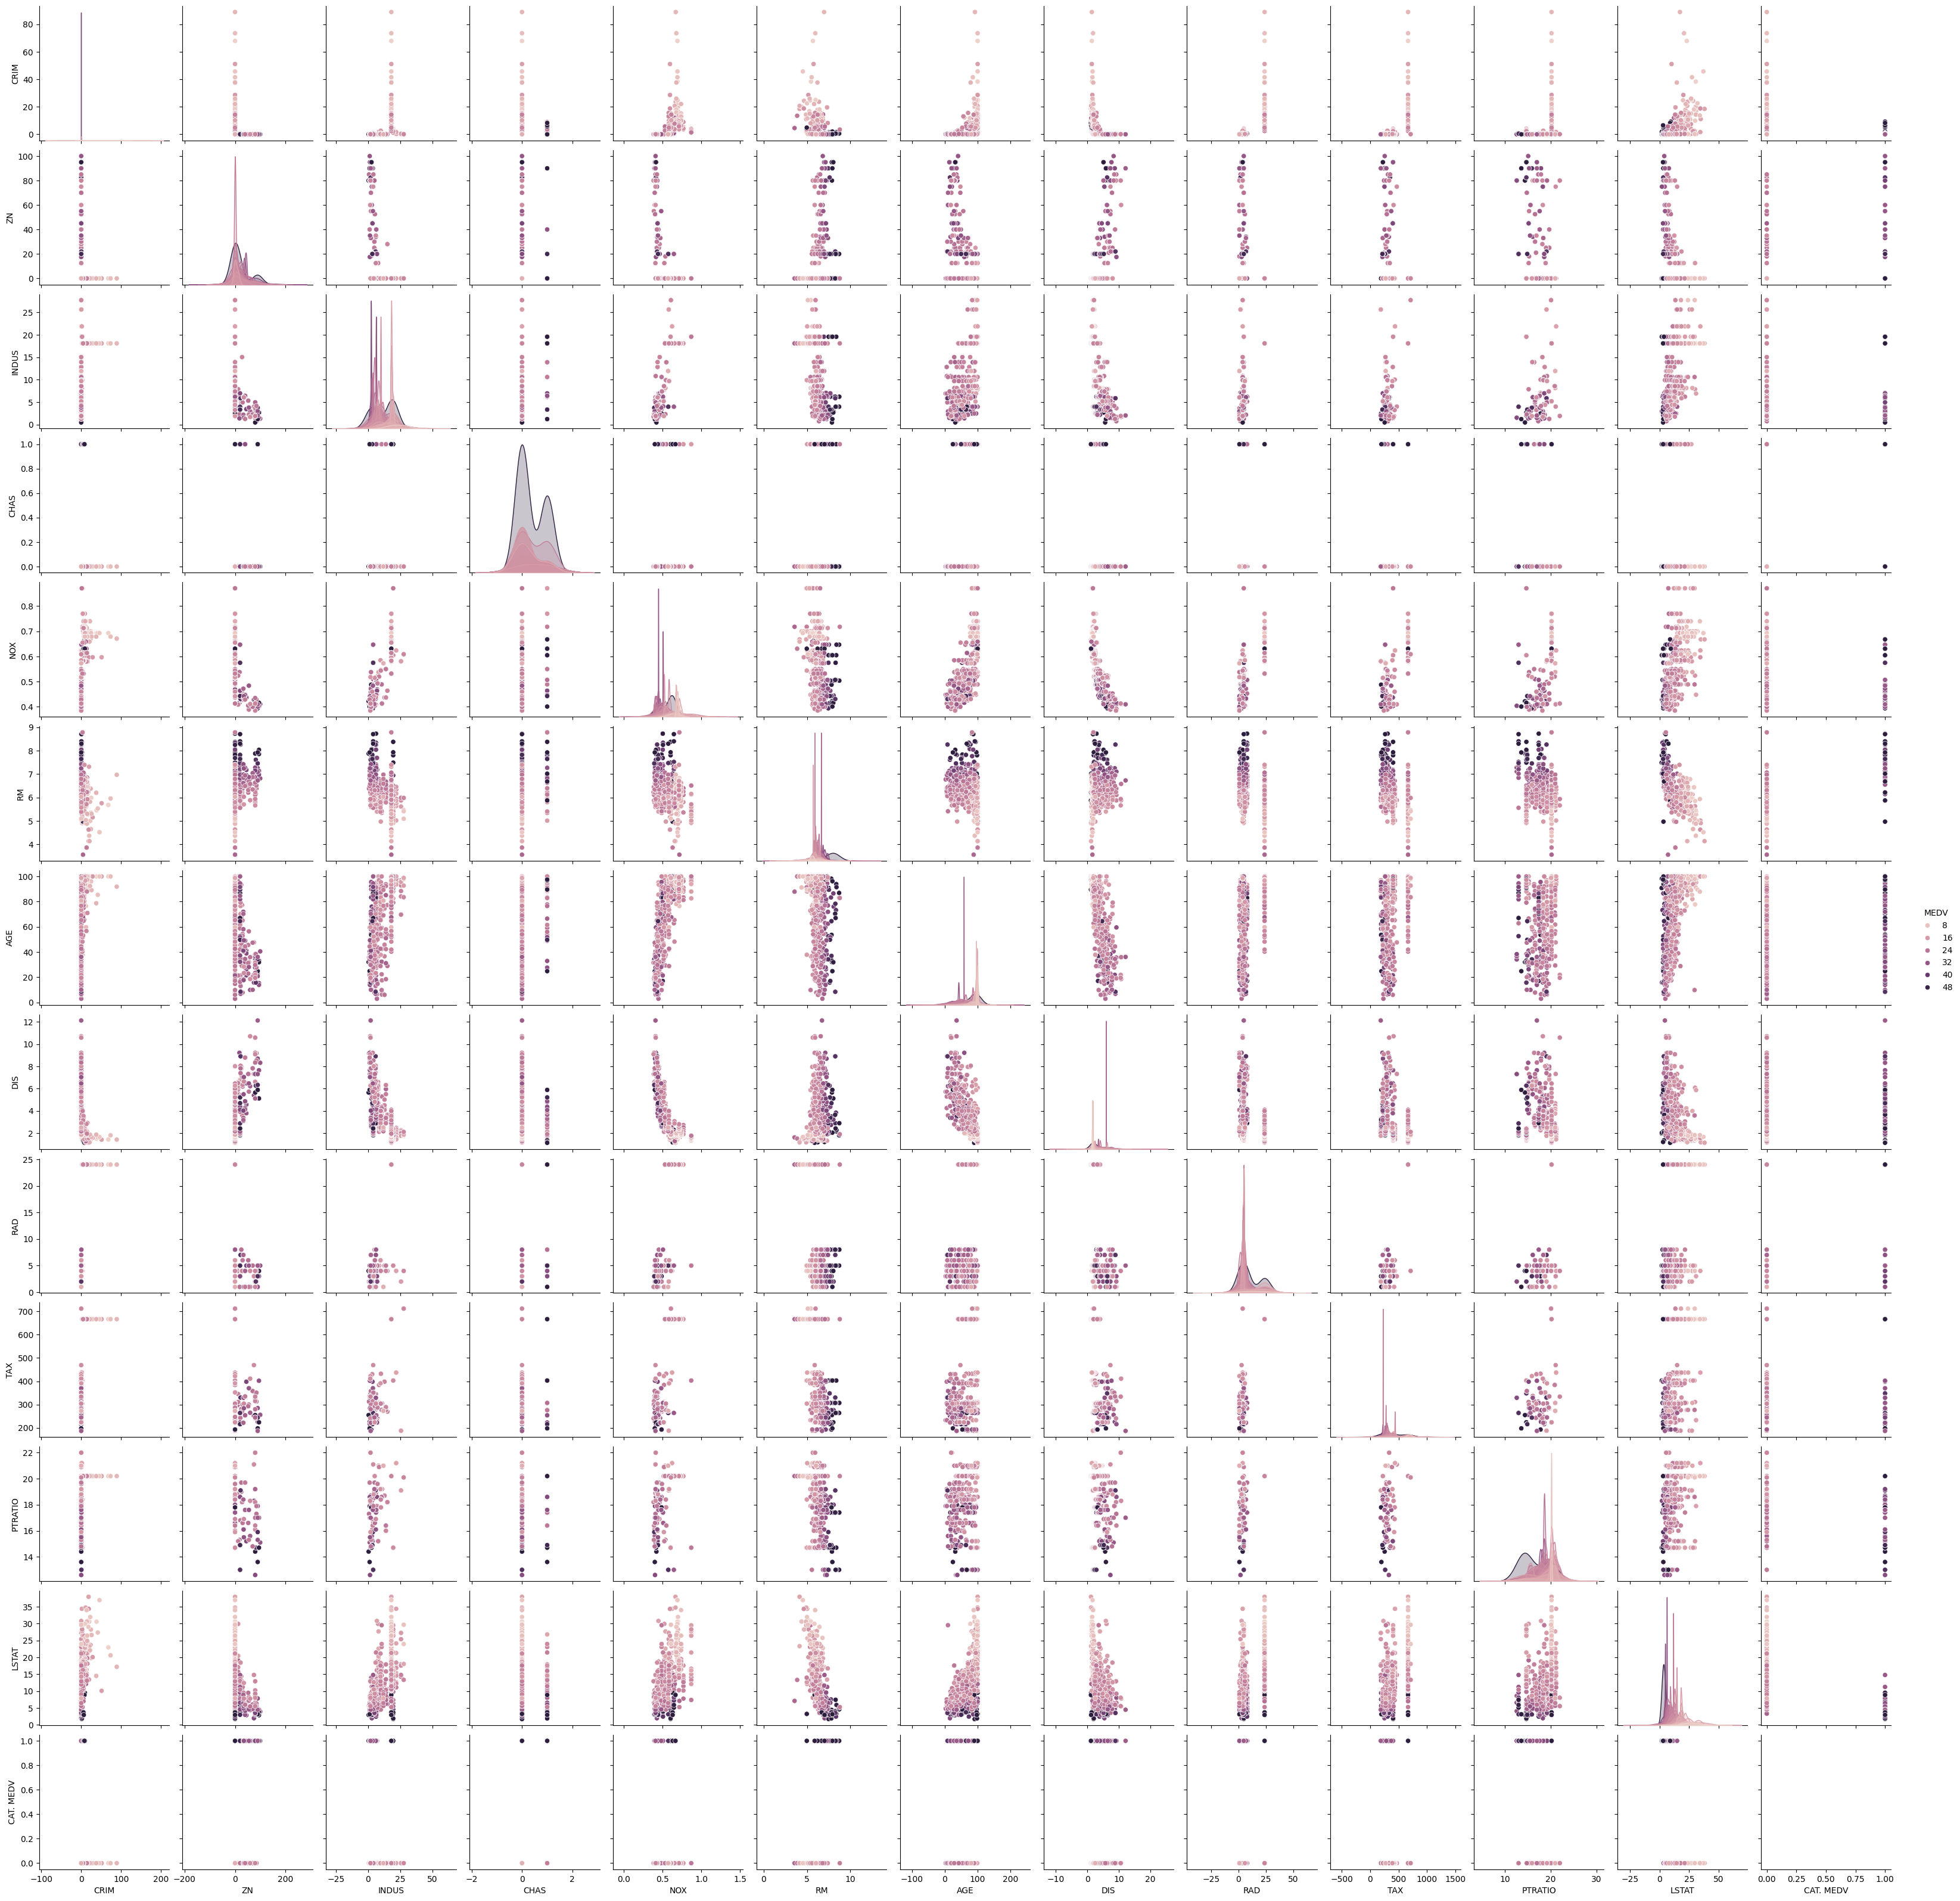

In [20]:

# Pairplot for the dataset
sns.pairplot(housing, hue = 'MEDV')
plt.show()

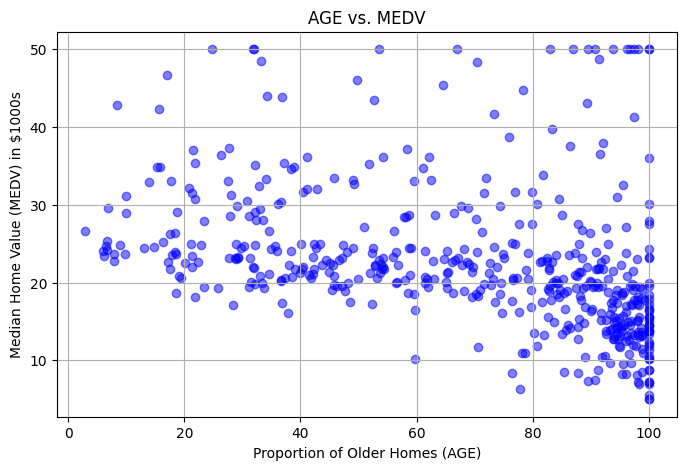

In [21]:
#Visulizing the Age vs MEDV
plt.figure(figsize=(8, 5))
plt.scatter(housing["AGE"], housing["MEDV"], color='blue', alpha=0.5)
plt.xlabel("Proportion of Older Homes (AGE)")
plt.ylabel("Median Home Value (MEDV) in $1000s")
plt.title("AGE vs. MEDV")
plt.grid(True)

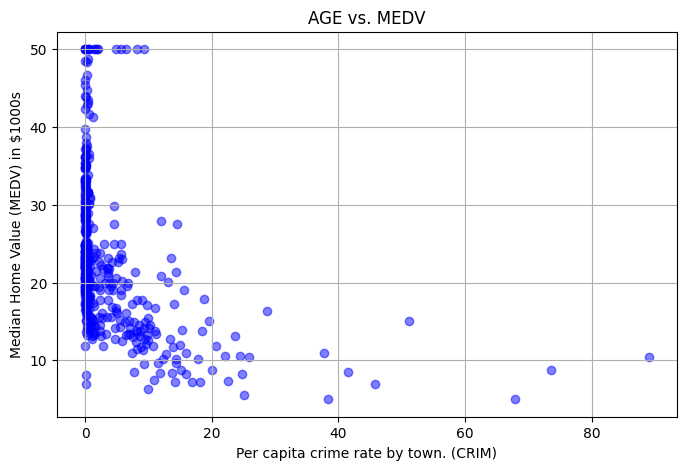

In [22]:
#Visulizing the CRIM vs MEDV
plt.figure(figsize=(8, 5))
plt.scatter(housing["CRIM"], housing["MEDV"], color='blue', alpha=0.5)
plt.xlabel("Per capita crime rate by town. (CRIM)")
plt.ylabel("Median Home Value (MEDV) in $1000s")
plt.title("AGE vs. MEDV")
plt.grid(True)

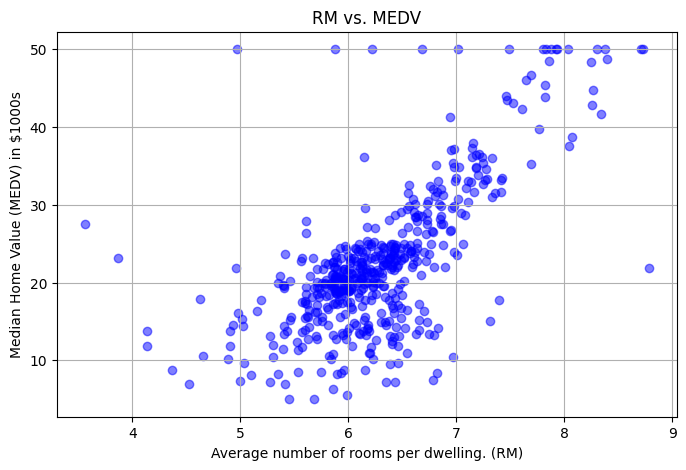

In [23]:
#Visulizing the Average number of rooms per dwelling vs median value of owner-occupied homes in $1000s
plt.figure(figsize=(8, 5))
plt.scatter(housing["RM"], housing["MEDV"], color='blue', alpha=0.5)
plt.xlabel("Average number of rooms per dwelling. (RM)")
plt.ylabel("Median Home Value (MEDV) in $1000s")
plt.title("RM vs. MEDV")
plt.grid(True)

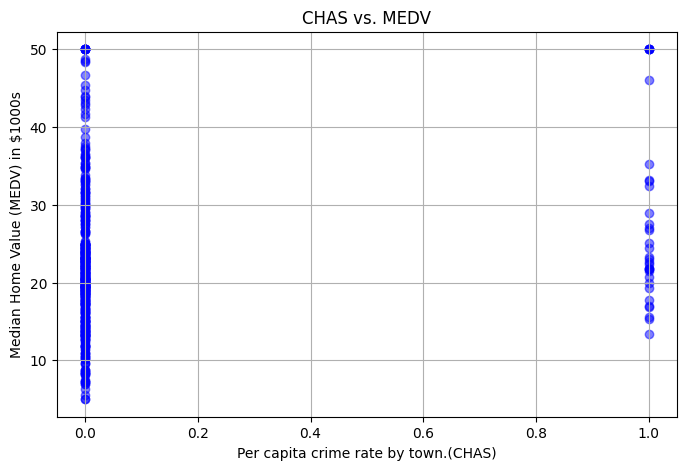

In [24]:
#Visulizing Charles River dummy variable CHAS vs median value of owner-occupied homes in $1000s
plt.figure(figsize=(8, 5))
plt.scatter(housing["CHAS"], housing["MEDV"], color='blue', alpha=0.5)
plt.xlabel("Per capita crime rate by town.(CHAS)")
plt.ylabel("Median Home Value (MEDV) in $1000s")
plt.title("CHAS vs. MEDV")
plt.grid(True)

# Correlation Heatmap


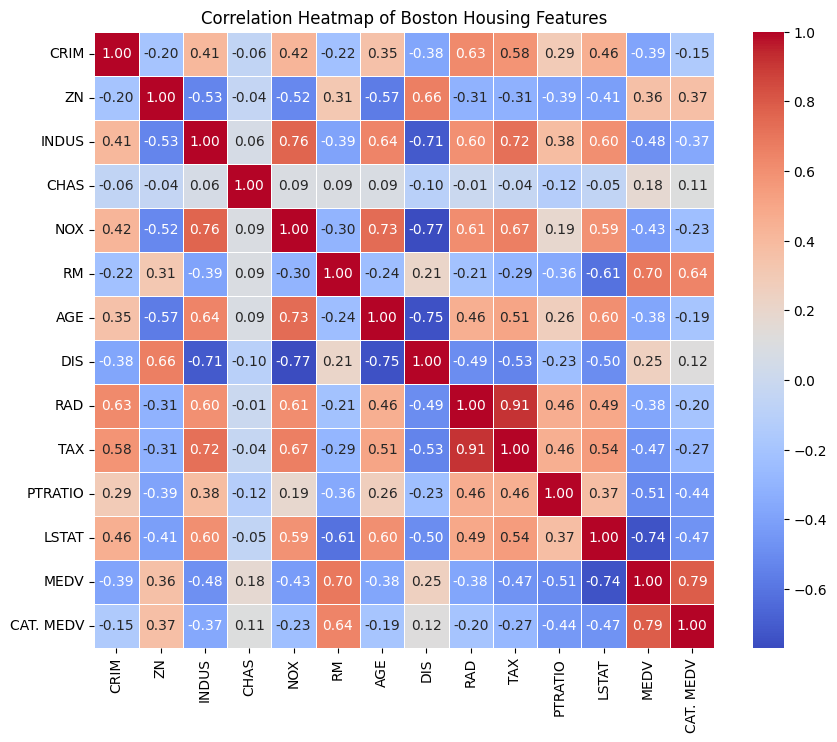

In [25]:


# Compute the correlation matrix
corr_matrix = housing.corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Boston Housing Features")
plt.show()

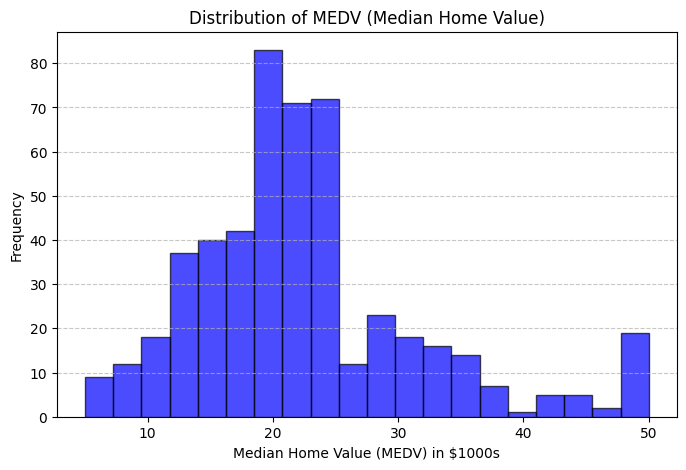

In [26]:
#Histrogram of MEDV (Median Home Value)
plt.figure(figsize=(8, 5))
plt.hist(housing["MEDV"], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Median Home Value (MEDV) in $1000s")
plt.ylabel("Frequency")
plt.title("Distribution of MEDV (Median Home Value)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Identify missing values and outliers.

In [27]:
# Missing Values Check
# Check for missing values
missing_values = housing.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64


### Since  all valuses are zero(0). No missing values

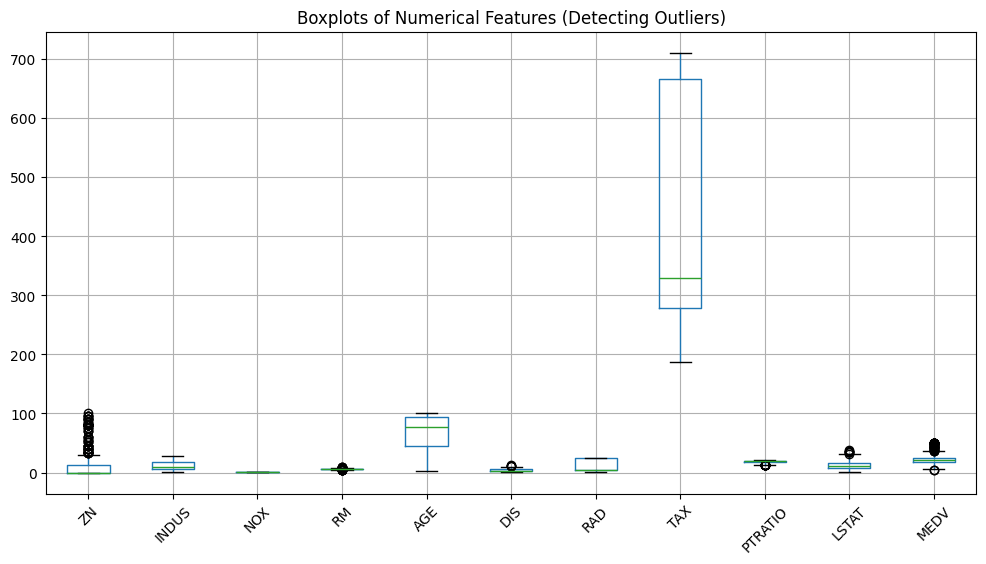

In [28]:
#Outlier Detection Using Boxplots

plt.figure(figsize=(12, 6))
housing.boxplot(column=["ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT", "MEDV"])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features (Detecting Outliers)")
plt.show()